# Multi-layer Neural Networks

Single-layer neural networks are relatively easy to implement, but they cannot compute nonlinear functions. Recall from the previous section that the XOR and XNOR gates could not be implemented using single-layer networks. We would need a **multi-layer neural network**, which is a network that contains one or more hidden layers. This will also require a more complicated learning algorithm.

For this section, we will use a 3-3-2 network, that is a 3-layer network with 3 neurons in the input layer, 3 neurons in the hidden layer, and 2 neurons in the output (Figure 1).

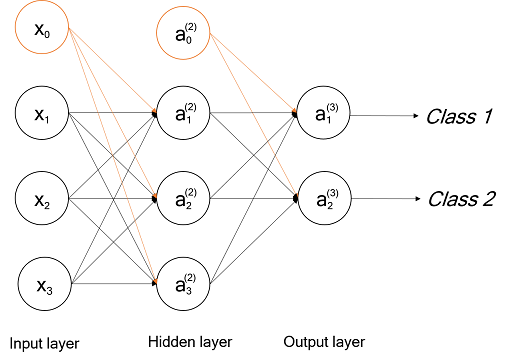

In [21]:
from IPython.display import Image
# Figure 1
Image('multilayer1.png')

The orange circles are the bias units. Like $x_{0}$, the value of $a_{0}$ is also equals to one. The superscript refers to the layer the unit is in, and the input layer is understood to be layer 1.

## Algorithm Overview

In a supervised learning problem, we assume that we are given a training data with inputs and the correct outputs. Using the given dataset, we want to train our neural network so that it can classify new inputs correctly. Its mechanism is an extension of the single-layer one: our network takes input data and propagates it through the network, multiplying the data with weights in each step. It eventually reaches the output layer and an output is given.

Essentially, the weights (and biases) determine the output of your network. We already saw in the previous section that simply by changing the weights, we can compute different logical operators. **Our goal for training neural networks is to adjust the weights in a way that best fits our dataset.**

We can determine how well our network 'fits' the training data by using a **cost function** (also called the error function or loss function), which is a function that measures the amount of error between the correct output and our network's output. We want to minimize the error, which leads to minimizing the cost function with the weights as parameters.

In order to solve any optimization problem, calculus (not me) dictates that you must find the derivative of the function with respect to the parameters. In our case, we will have to find the derivative of the cost function with respect to the weights. We can get these derivatives using the **backpropagation algorithm**.

Having the derivatives, we can now use them in an optimization algorithm to find the minimum of the cost function. After a sufficient training period (could be minutes, hours, or days, depending on the problem), our network is well-trained and ready to go!

We will deal with the topics in more detail in each section. Don't worry if you don't get it yet - it takes time for this to sink in.

## Forward Propagation

As mentioned earlier, the idea of a multi-layer network is basically an extension of the single-layer one. The activations are the sum of the products of the weights and input, though only the weights with edges connected to the activation are taken into account. Try to get an intuition of this by hovering the mouse over the $a^{(2)}$ and $a^{(3)}$ nodes in Figure 2.

Also take note of the notation of the weights. The weight $w_{i,j}^{(l)}$ means the weight connecting neuron $i$ in the $(l+1)^{th}$ layer to the neuron $j$ in the $l^{th}$ layer. So $w_{12}^{(1)}$ denotes the weight connecting node 1 in layer 2 to node 2 in layer 1.

In [11]:
%%html
<!--Figure 2-->
<img id ="multilayerjs" src="multilayerjs1.png" alt="Multilayer Network" usemap="#weightsmap" />

<script>
function getImage(x) {document.getElementById('multilayerjs').src= x;}
</script>

<map name="weightsmap">

<area shape ="circle" coords ="210,140,35" alt="a1(2)"
onmouseover="getImage('multilayerjsa12.png')" onmouseout="getImage('multilayerjs1.png')"/>

<area shape ="circle" coords ="210,247,35" alt="a2(2)"
onmouseover="getImage('multilayerjsa22.png')" onmouseout="getImage('multilayerjs1.png')"/>

<area shape ="circle" coords ="210,354,35" alt="a3(2)"
onmouseover="getImage('multilayerjsa32.png')" onmouseout="getImage('multilayerjs1.png')"/>

<area shape ="circle" coords ="387,140,35" alt="a1(3)"
onmouseover="getImage('multilayerjsa13.png')" onmouseout="getImage('multilayerjs1.png')"/>

<area shape ="circle" coords ="387,247,35" alt="a1(3)"
onmouseover="getImage('multilayerjsa23.png')" onmouseout="getImage('multilayerjs1.png')"/>

</map>

Data from the input layer is passed forward. Input values $x_{1}, x_{2}, \dots ,x_{n}$ and the corresponding weights are used to calculate activation values in the next layer, which are in turn used to calculate subsequent activation values, and eventually the output. This mechanism is also called **forward propagation**.

The quickest way to implement forward propagation is to use matrix multiplication (here comes the math!). Our three-layer network has two sets of weights, one connecting the input layer to the hidden layer, and another connecting the hidden layer to the output layer. Each weight matrix contains all the weight values connecting the two layers. $w^{(1)}$ and $w^{(2)}$ are defined as:

$$
w^{(1)} =
\begin{bmatrix}
w_{10}^{(1)} & w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)}\\ 
w_{20}^{(1)} & w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)}\\ 
w_{30}^{(1)} & w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)}
\end{bmatrix}
$$

$$
w^{(2)} =
\begin{bmatrix}
w_{10}^{(2)} & w_{11}^{(2)} & w_{12}^{(2)} & w_{13}^{(2)}\\
w_{20}^{(2)} & w_{21}^{(2)} & w_{22}^{(2)} & w_{23}^{(2)}
\end{bmatrix}
$$

So, the weird notation for the weights is simply its index in the weight matrix. Note that the rows start the indexing from 1, while the columns start the indexing from 0. Each column corresponds to all the weights connected to a single node - that is, column 0 in $w^{(1)}$ are all the weights connected to node $x_{0}$.

For a single training example, input $x$ is a vector $x=[x_{0}, x_{1}, \dots , x_{n}]$. In our case, it is:
$$
x = 
\begin{bmatrix}
x_{0}\\ 
x_{1}\\ 
x_{2}\\ 
x_{3}
\end{bmatrix}
$$

$y$ is a vector with dimensions equal to the number of output nodes (that is, the number of classes). For our network, 
$y = \begin{bmatrix} 1\\ 0 \end{bmatrix}$ if our input is class 1, and $y = \begin{bmatrix} 0\\ 1 \end{bmatrix}$ if our input is class 2.

By simply multiplying $w^{(1)}x$, we can obtain a vector containing the sum of products:
$$
 w^{(1)}x = 
 \begin{bmatrix}
 w_{10}^{(1)} & w_{11}^{(1)} & w_{12}^{(1)} & w_{13}^{(1)}\\ 
 w_{20}^{(1)} & w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)}\\ 
 w_{30}^{(1)} & w_{31}^{(1)} & w_{32}^{(1)} & w_{33}^{(1)}
\end{bmatrix}
\times
\begin{bmatrix}
x_{0}\\ 
x_{1}\\ 
x_{2}\\ 
x_{3}
\end{bmatrix}
=
\begin{bmatrix}
w_{10}^{(1)}x_{0} + w_{11}^{(1)}x_{1} + w_{12}^{(1)}x_{2} + w_{13}^{(1)}x_{3}\\
w_{20}^{(1)}x_{0} + w_{21}^{(1)}x_{1} + w_{22}^{(1)}x_{2} + w_{23}^{(1)}x_{3}\\
w_{30}^{(1)}x_{0} + w_{31}^{(1)}x_{1} + w_{32}^{(1)}x_{2} + w_{33}^{(1)}x_{3}
\end{bmatrix}
=
\begin{bmatrix}
z_{1}^{(2)}\\
z_{2}^{(2)}\\
z_{3}^{(2)}
\end{bmatrix}
$$

Unlike the perceptrons, however, we will not send the sum of products (now denoted as $z$) as activations to the next layer just yet. Recall that the perceptron outputs only binary values: a 1 if the sum of products exceed 0, and a 0 otherwise. In other words, the perceptron uses a **step function** as its algorithm (Graph 1).

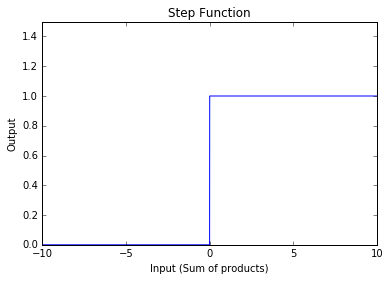

In [18]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Graph 1
x = np.arange(-10, 10, 0.001)
y = 0.5 * (np.sign(x) + 1)

plt.plot(x, y)
plt.xlabel('Input (Sum of products)')
plt.ylabel('Output')
plt.axis([-10, 10, 0, 1.5])
plt.title('Step Function')
plt.show()

The step function isn't very practical in real-world applications. Since it can only output 0 or 1, a small change in the weights might cause a drastic change in the output. What we want, therefore, is an algorithm that can output intermediate values between 0 and 1.

This is where special **activation functions** come in. Instead of just propagating the value of $z$ to the next layer, we will first pass it through an activation function. Some examples of activation functions include the tanh, sigmoid, and rectified linear function, but in this tutorial we will make use of the **sigmoid function**.

## Sigmoid Function

The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

The graph of the sigmoid function is shown below.

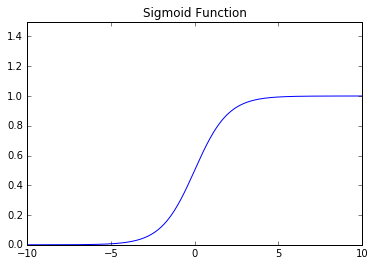

In [4]:
# Graph 2
x = np.arange(-10, 10, 0.001)
y = 1/(1+np.exp(-x))

plt.plot(x, y)
plt.axis([-10, 10, 0, 1.5])
plt.title('Sigmoid Function')
plt.show()

Notice that for a very large positive number, $g(z)$ is approximately 1, and for a large negative number, $g(z)$ is approximately 0. So superficially, for large numbers, the sigmoid function behaves similarly to the step function.

To iterate, instead of just sending the sums of products to the next layer, we will first pass it through the sigmoid function. We will denote this value as the activation $a$. So, forward propagation look something like this:

1. Given input $x$
2. Compute intermediate value: $z^{(2)} = w^{(1)}x$
3. Compute activation: $a^{(2)} = g(z^{(2)})$
4. Compute intermediate value: $z^{(3)} = w^{(2)}a^{(2)}$
5. Output: $a^{(3)} = g(z^{(3)})$


## The Cost Function

The cost function is a measure of how good a set of weight 'fits' our training data. That is, a lower cost function corresponds to a lower error and thus, better performance of the network. **Our goal in training neural networks is to optimize the weights in such a way that the cost function (i.e. errors) is at a minimum.**

There are many cost functions available, but we are going to use the cross-entropy error function. It is defined as follows:

$$ J(z) = -y\log(g(z)) - (1-y)\log(1-(g(z)))$$

where $y$ is the actual output and $g(z)$ is our network's output.

Our multi-layer neural network outputs values from 0 to 1 according to the probability that something is a "yes" or "no." Think of a simple classification system in which we are trying to classify whether an image contains a person or not. Our network would output values close to 1 if it thinks the image contains a person, and close to 0 otherwise.

Let's say in a training example, the image contains a person, so the expected output is $y = 1$. When we plug in $y=1$ to the equation above, you can see that the second term of the cost function, $(1-(1))\cdot \log(1-(g(z))$, disappears, and only the first term, $-(1)\cdot \log(g(z))$, is left. Let's see the graph of $-\log(g(z))$.

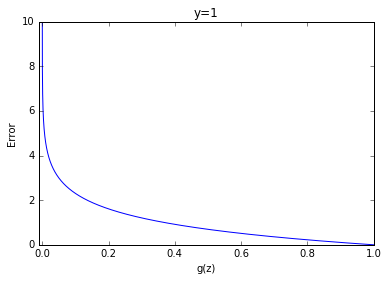

In [5]:
# Graph 3: -log(g(z))
x = np.arange(0.00001, 1, 0.00001)
y = -np.log(x)

plt.plot(x, y)
plt.xlabel('g(z)')
plt.ylabel('Error')
plt.axis([-0.01, 1, 0, 10])
plt.title('y=1')
plt.show()

Our network's output is on the x-axis. As you can observe, if $y=1$, the higher the error will be the closer $g(z)$ is to 0. This indicates that the weights are probably not very good. On the other hand, If $y=1$ and our network's output is also 1, the error is 0.

Now let as look at the case where $y=0$: a training example that doesn't contain a person in the image. Plugging in y=0 in the equation, the first term of the cost function disappears, leaving only the term $-(1-(0))\cdot \log(1-(g(z))$. The graph of $-\log(1-(g(z))$ is plotted below.

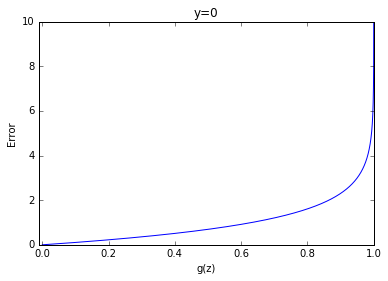

In [6]:
# Graph 4: -log(1-(g(z))
x = np.arange(0.00001, 1, 0.00001)
y = -np.log(1-x)

plt.plot(x, y)
plt.xlabel('g(z)')
plt.ylabel('Error')
plt.axis([-0.01, 1, 0, 10])
plt.title('y=0')
plt.show()

In a similar vein, when $y=0$, the error will be 0 if the network's output is also 0. However, the closer the network's output is to 1, the higher the error is.

To repeat, we'd like a set of weights that will minimize the error the entire training set. So actually, the function is also divided by the number of examples to get the average. For $m$ training examples, we'd like to sum over all the errors and average them, so our cost function becomes:

$$ J = -\frac{1}{m}\sum_{m}[-y\log(g(z)) - (1-y)\log(1-(g(z)))]$$

Now, let's see how we can optimize the weights!

## Backpropagation

Now that we know how the cost function works, we want to find its derivatives in order to minimize it. Backpropagation is fundamentally a technique for calculating derivatives quickly.

Let's repeat the neural network diagram again here, with focus on the node $x_{1}$ and the weights associated to it.

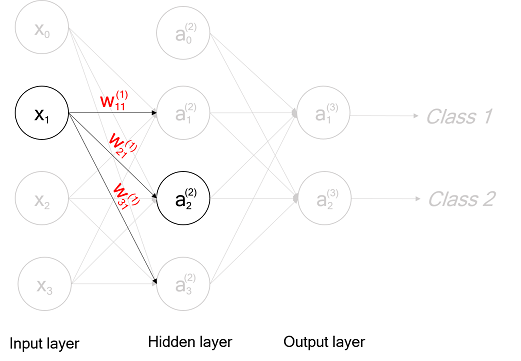

In [12]:
# Figure 3
Image('multilayerx1.png')

Imagine perturbing the weight $w_{11}^{(1)}$ slightly. This would slightly change the value of $a_{1}^{(2)}$, since the activation value depends on the weights. The change in $a_{1}^{(2)}$ would in turn affect the value of $a_{1}^{(3)}$ as well as $a_{2}^{(3)}$, and could change the output. A similar thing happens if you perturb the values of $w_{21}^{(1)}$, $w_{31}^{(1)}$, or any weight in the network for that matter. The change in a weight's value affects all the nodes in subsequent layers of the network. **Backpropagation measures how the output changes with regards to all the weights in the network.** To phrase it more mathematically, backpropagation uses the chain rule to compute the derivative of the output with respect to ALL the weights ($ \frac{\partial J}{\partial w}$). 

### Backpropagation Equations

*The derivations of the three equations in this subsection can be found in the appendix. You may also want to check the links Further Readings section, as they provide a more thorough and intuitive explanation.*

In order to compute the derivatives, we will need the help of a new variable $\delta$.  $\delta_{j}^{(l)}$ refers to the error of node $j$ in layer $l$. Whenever our network makes a mistake in calculations, we assume that every node contributes a little to that mistake. Thus, we can visualize that each node has an error value associated with it, and the notation is exactly the same as the activations (Figure 4).

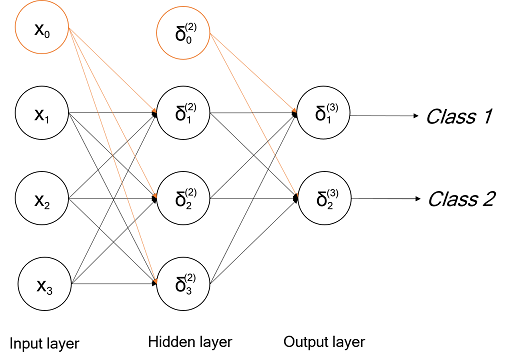

In [13]:
# Figure 4
Image('multilayerdelta.png')

There are two equations to calculate the $\delta$ values, one for the output layer and one for the hidden layers.

For the output layer $L$ and node $j$, the error is:
$$
\begin{equation}
\delta_{j}^{(L)} = a_{j}^{(L)}-y_{j}
\end{equation}
$$

where $y$ is the correct output and $a_{j}^{(L)}$ is the output predicted by our network. This is quite intuitive to understand - the error in the final layer is simply the difference between the actual output and the predicted output.

For node $j$ in hidden layer $l$, the error is:
$$
\begin{equation}
\delta_{j}^{(l)} = \sum_{i}w_{ij}^{(l)} \delta_{i}^{(l+1)} \cdot g'(z_{j}^{(l)})
\end{equation}
$$

The error of a node in an intermediate layer is determined by the the error from all the nodes in the next layer and their corresponding weights.

Some visualization will help here. Suppose we want to calculate $\delta_{2}^{(2)}$:

$$\delta_{2}^{(2)} = (w_{12}^{(2)} \delta_{1}^{(3)}+w_{22}^{(2)} \delta_{2}^{(3)})\cdot g'(z_{2}^{(2)})$$

Take a look at Figure 5. (The arrow is drawn backwards to indicate that the error in layer $l+1$ is used to calculate the error in layer $l$.)

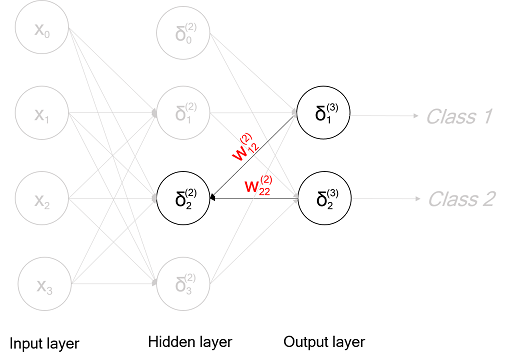

In [4]:
# Figure 5
Image('multilayerd22.png')

To put it simply, backpropagation is just like the reverse of forward propagation. **In forward propagation, the activations from all the nodes in the *previous* layer are used to calculate the activations in the present layer. In backpropagation, the errors from all the nodes in the *next* layer are used to calculate the errors in the present layer.** Figure 6 demonstrates the difference between the two.

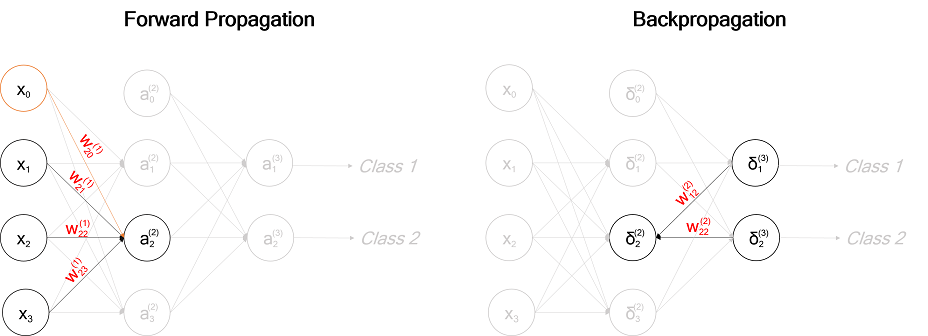

In [16]:
# Figure 6
Image('fpbpcomparison.png')

Suppose we have a network with $L$ layers. Our approach would be to determine all the errors, that is, $\delta^{(L)}, \delta^{(L-1)}, \delta^{(L-2)}, \dots \delta^{(2)}$, and use these values to calculate the derivative of $J$. (There is no $\delta^{(1)}$ because layer 1 is the input layer, and thus has no error.) 

That is, we calculate the errors starting from the final layer $L$, then we *backpropagate* the errors, sending it back through the network.

We can then use all these $\delta$ values to calculate the derivative of the cost function $J$ with respect to all the weights. The partial derivative of $J$ with respect to the weight in layer $l$ is given as:

$$
\begin{equation}
\frac{\partial J}{\partial w_{ij}^{(l)}} =  a_{j}^{(l)} \delta_{i}^{(l+1)}
\end{equation}
$$

Suppose we want to calculate the derivative with respect to the weight $w_{21}^{(1)}$.

$$
\frac{\partial J}{\partial w_{21}^{(1)}} =  a_{1}^{(1)} \delta_{2}^{(2)} = x_{1} \delta_{2}^{(2)}
$$

Note that $a_{1}^{(1)} = x_{1}$, since the activation of the first layer is just the input layer. Take a look at Figure 7. The derivative depends on the nodes in which the weight is connected to. The error comes from next layer, $l+1$, while the activation comes from the previous layer, $l$.

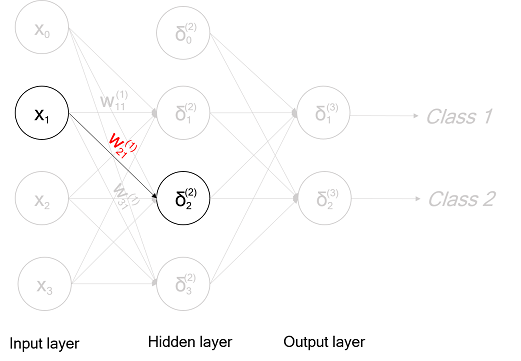

In [14]:
# Figure 7
Image('multilayerw21.png')

### Backpropagation Algorithm

Now that we have all the needed equations, the whole backpropagation works as follows:
Given a training example $(x, y)$, with $x =  \begin{bmatrix} x_{0}\\ x_{1}\\ \vdots \\ x_{n} \end{bmatrix}$ and $y$ being the correct output:

1. **Input:** Set $a^{(1)} = x$

2. **Forward propagation:** Compute activations $a^{(l)}$ for $l=2,3, \dots, L$

3. **Compute output error:** $\delta^{(L)} = a^{(L)} - y$

4. **Backpropagate the error:** Compute $\delta^{(L-1)}, \delta^{(L-2)}, \dots \delta^{(2)}$ using equation (2).

5. **Compute gradient(s):** $\frac{\partial J}{\partial w^{(l)}} =  a^{(l)} \delta^{(l+1)}$

For $m$ training examples, we loop all the steps then average the gradient over $\frac{1}{m}$.

Also note that for our sample neural network of 3 layers, we would need to compute two gradients, one for the $w^{(1)}$ (the weights connecting the input layer to the hidden layer), and another for $w^{(2)}$ (the weights connecting the hidden layer to the output layer).

Now let's see how we can use the partial derivatives obtained from backpropagation to minimize the cost function.

## Optimization Algorithm: Gradient Descent

There are plenty of optimization algorithms, but the most common and essential one is called the **gradient descent**. A gradient is a vector of partial derivatives of a function.

The gradient descent algorithm uses the derivatives of a function to find either its minimum or maximum. For our cost function, we can use gradient descent to find the minimum. The algorithm is as follows:

$$
repeat \ until \ convergence: \\
\quad w_{j} := w_{j} - \alpha \frac{\partial J}{\partial w_{j}}
$$

What the algorithm does is it defines a new value of the weight by subtracting the old value with its derivative. $\alpha$ is a constant called the learning rate - don't worry too much about it for now.

Let us try to have some intuition on how the gradient descent works. Suppose we have a bowl-shaped curve $J=w_{1}^{2}$ (Graph 5) that is a function of only $w_{1}$, and we want to find the value of $w_{1}$ that gives us the minimum of the curve. We can already see that the minimum is when $w_{1}=0$, but let's assume we know nothing about what the curve looks like.

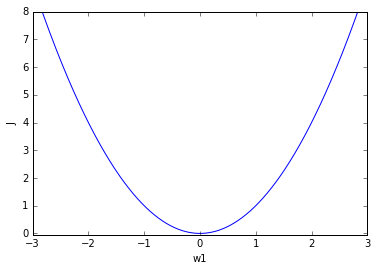

In [19]:
# Graph 5
w1 = np.arange(-3, 3, 0.01)
J = np.power(w1, 2)

plt.plot(w1, J, 'b')
plt.xlabel('w1')
plt.ylabel('J')
plt.axis([-3, 3, -0.05, 8])
plt.show()

You can also think of the derivative as being the slope at a certain point of the curve, or as the tangent line to the curve. These are all equivalent meanings of the derivative. To demonstrate, try to input any number $w$ from -3 to 3 in the code below, and run the code. The red line is the tangent line (that is, the derivative) to the curve at point $(w, J)$.

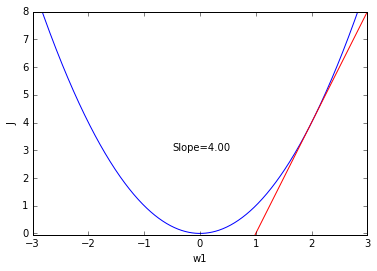

In [20]:
#################################
# Input any number from [-3, 3]
w = 2
#################################
w1 = np.arange(-3, 3, 0.01)
J = np.power(w1, 2)
slope = 2*w
y1 = w**2
y = slope*(w1-w) + y1

plt.text(-0.5,3,'Slope=%.2f' % slope)
plt.plot(w1, J, 'b', w1, y, 'r')
plt.xlabel('w1')
plt.ylabel('J')
plt.axis([-3, 3, -0.05, 8])
plt.show()

As you can observe, the slope is negative for a negative number and positive for a positive number.

Let's say we randomly initialize $w_{1}=2$ and we set $\alpha=0.1$. The slope $\frac{\partial J}{\partial w_{1}}=4$, a positive number. Our equation for gradient descent is:

$w_{j} := w_{j} - \alpha \frac{\partial J}{\partial w_{j}}$.

In the first gradient descent algorithm iteration, our new $w_{1}$ is computed as:

$ w_{1} = (2) - (0.1)(4) = 1.6 $

This means $w_{1}$ is moving closer to the minimum! If we repeat the algorithm enough times, it will eventually arrive at the minimum, which in this case is 0. To illustrate this a bit further:

Second iteration: $w_{1} = (1.6) - (0.1)(3.2) = 1.28 $

Third iteration: $w_{1} = (1.28) - (0.1)(2.56) = 1.024 $

...

And so on. We keep on doing this until the weight stops changing between iterations, in which case we can stop the algorithm and say the weight has **converged**.

What if we instead started off with a negative value of $w_{1}$? Let's see what happens when $w_{1}=-2$. The slope, $\frac{\partial J}{\partial w_{1}}$, then becomes -4. $\alpha$ is still 0.1, so our new value of $w_{1}$ is computed as:

$ w_{1} = (-2) - (0.1)(-4) = -1.6 $

As you can see, it still moves closer to the local minimum. The good part of this algorithm is even with thousands or tens of thousands of parameters, it still works!

To sum it up, **gradient descent uses partial derivatives to minimize the error of our neural network**. The partial derivatives were found using the backpropagation algorithm.

## Learning Algorithm Revisited

Now, we can put everything together and state the learning algorithm for multi-layer networks in a stepwise manner.

Given a set of $m$ training examples:

1. Randomly initialize weights.
2. For each training example:
    - **Forward propagation** to compute activations $a^{(l)}$ for $l=2,3, \dots, L$.
    - **Backpropagation** to compute gradients (partial derivatives) $\frac{\partial J}{\partial w^{(l)}}$.
3. Use **gradient descent** (or other optimization algorithms) to minimize the cost function with parameters $w$.

This is the backbone of a general learning algorithm for multi-layer neural networks. There are of course other details and ways you can improve this algorithm, such as cleverly initializing the weights, using regularization, using gradient checking, or using efficient optimization algorithms.

The next section deals with a simple implementation of neural networks to perform nonlinear classification. The theory explained in this lesson will become more clear by then!

## References & Further Readings

- [A Basic Introduction to Neural Networks](http://www.webpages.ttu.edu/dleverin/neural_network/neural_networks.html)
- [Coursera: Machine Learning](https://www.coursera.org/learn/machine-learning)
- [Cross Entropy Error Function](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression)
- [Cost Function and Gradient Descent](http://cs231n.github.io/optimization-1/)
- [Neural Networks and Deep Learning: Chapter 2](http://neuralnetworksanddeeplearning.com/chap2.html)
- [Calculus on Computational Graphs: Backpropagation](http://colah.github.io/posts/2015-08-Backprop/)



## Appendix

### Derivation of equation (1)

We will derive the following equation:

$$\delta_{j}^{(L)} = a_{j}^{(L)}-y_{j}$$

By definition, $\delta$ is the change in the cost function $J$ with respect to the intermediate value $z$. (Recall that $z$ is the sum of products between the activation and weights of the previous layer: $z^{(L)} = w^{(L-1)}a^{(L-1)}$.) In mathematical terms:

$$\delta_{j}^{(L)} = \frac{\partial J}{\partial z_{j}^{(L)}}$$

Also recall that $z$ has to go through an activation function before it gets passed on to the next layer as the activation. So we had $a_{j}^{(L)}=g(z_{j}^{(L)})$. This means that we will have to apply the chain rule to the equation above: 

$$\delta_{j}^{(L)} = \frac{\partial J}{\partial z_{j}^{(L)}} = \frac{\partial J}{\partial a_{j}^{(L)}} \frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}}$$

Since $a_{j}^{(L)}=g(z_{j}^{(L)})$, we can write the derivative of $a_{j}^{(L)}$ as:

$$\frac{\partial a_{j}^{(L)}}{\partial z_{j}^{(L)}} = g'(z_{j}^{(L)})$$


Now, we can rewrite the equation as:
$$ \delta_{j}^{(L)} = \frac{\partial J}{\partial a_{j}^{(L)}} g'(z_{j}^{(L)})$$

This is the most general form of $\delta^{(L)}$. Depending on the cost function $J$ and the activation function $g$ we choose, the derivation to get to the end equation will be slightly different. The sigmoid function, $g(z) = \frac{1}{1+e^{-z}}$, has a very nice derivative (which we unfortunately won't show the derivation here):

$$g'(z) = g(z) \cdot (1-g(z))$$.

For our purposes, we can also write $g'(z^{(L)}) = a^{(L)} \cdot (1-a^{(L)})$, since again, $g(z^{(L)}) = a^{(L)}$.

Now we have to derive $\frac{\partial J}{\partial a_{j}^{(L)}}$. Recall that our cost function is:

$$ J = -y\log(g(z)) - (1-y)\log(1-(g(z)))$$

We are going to rewrite it as:

$$ J = -y\log(a^{(L)}) - (1-y)\log(1-a^{(L)})$$

Let's derive the cost function with respect to $a_{j}^{(L)}$:

$$ \frac{\partial J}{\partial a_{j}^{(L)}} = \frac{\partial }{\partial a_{j}^{(L)}}[-y\log(a_{j}^{(L)}) - (1-y)\log(1-a_{j}^{(L)})]$$

$$ = -y \frac{\partial }{\partial a_{j}^{(L)}} \log(a_{j}^{(L)})  - (1-y) \frac{\partial }{\partial a_{j}^{(L)}} \log(1-a_{j}^{(L)})$$


$$ = -y \frac{\frac{\partial}{\partial a_{j}^{(L)}} a_{j}^{(L)}}{a_{j}^{(L)}}  - (1-y) \frac{\frac{\partial}{\partial a_{j}^{(L)}} (1-a_{j}^{(L)})}{1- a_{j}^{(L)}} $$

$$ = - \frac{y}{a_{j}^{(L)}} + \frac{1-y}{1-a_{j}^{(L)}} $$

So, if we plug in $\frac{\partial J}{\partial a_{j}^{(L)}}$ and $g'(z)$ to our original equation:

$$ \delta_{j}^{(L)} = \frac{\partial J}{\partial a_{j}^{(L)}} g'(z_{j}^{(L)})$$

$$ = \bigg(- \frac{y}{a_{j}^{(L)}} + \frac{1-y}{1-a_{j}^{(L)}} \bigg)[a_{j}^{(L)}(1-a_{j}^{(L)})] $$

$$ = - \frac {y \cdot a_{j}^{(L)}(1-a_{j}^{(L)})}{a_{j}^{(L)}} + \frac{(1-y)a_{j}^{(L)}(1-a_{j}^{(L)})}{1-a_{j}^{(L)}}$$

$$ = -y(1-a_{j}^{(L)}) + (1-y)a_{j}^{(L)} $$

$$ = -y + a_{j}^{(L)}y + a_{j}^{(L)} - a_{j}^{(L)}y $$

$$
= a_{j}^{(L)}-y
$$

Thus, equation (1) is proved.

### Derivation of equation (2)

We will derive the equation:

$$
\delta_{j}^{(l)} = \sum_{i}w_{ij}^{(l)} \delta_{i}^{(l+1)} \cdot g'(z_{j}^{(l)})
$$

Let's start once more using the definition of $\delta$. $\delta$ is the change in the cost function $J$ with respect to the intermediate value $z$.

$$\delta_{j}^{(l)} = \frac{\partial J}{\partial z_{j}^{(l)}}$$:

We can describe the change in $z_{j}$ by using all the nodes in layer $l+1$. Recall that slightly changing the value of $z_{j}$ will affect the values of all the activations in the following layer. Thus,

$$\delta^{(l)} = \frac{\partial J}{\partial z_{j}^{(l)}} = \sum_{i} \frac{\partial J}{\partial z_{i}^{(l+1)}} \frac{\partial z_{i}^{(l+1)}}{\partial z_{j}^{(l)}}$$

The first term can be written in terms of $\delta^{(l+1)}$:
$$ \frac{\partial J}{\partial z_{i}^{(l+1)}} = \delta_{i}^{(l+1)}$$

Plugging into the equation:
$$\delta_{i}^{(l)} = \sum_{i} \delta_{i}^{(l+1)} \frac{\partial z_{i}^{(l+1)}}{\partial z_{j}^{(l)}}$$

Recall that:

$$z_{i}^{(l+1)} = \sum_{i} w_{ij}^{(l)}a_{j}^{(l)} = \sum_{i} w_{ij}^{(l)}g(z_{j}^{(l)})$$

Differentiate the equation and you get:

$$ \frac{\partial z_{i}^{(l+1)}}{\partial z_{j}^{(l)}} = w_{ij}^{(l)}g'(z_{j}^{(l)})$$

Now, you can plug it in the original equation to obtain:

$$\delta_{j}^{(l)} = \sum_{i} \delta_{i}^{(l+1)} \frac{\partial z_{i}^{(l+1)}}{\partial z_{j}^{(l)}} = \sum_{i} \delta_{i}^{(l+1)} w_{ij}^{(l)}g'(z_{j}^{(l)})$$

And thus, equation (2) is proved.

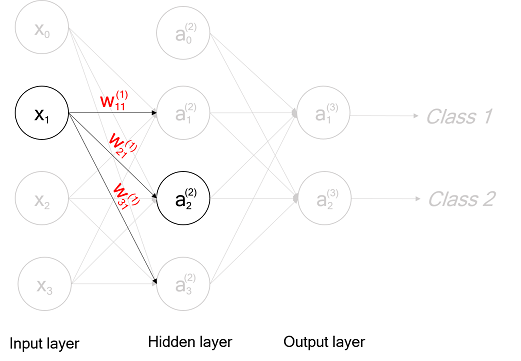

In [23]:
# Figure 3 repeated
Image('multilayerx1.png')

### Derivation of equation (3)

In this subsection, we are proving that:

$$\frac{\partial J}{\partial w_{ij}^{(l)}} =  a_{j}^{(l)} \delta_{i}^{(l+1)}$$

Suppose we want to know how the cost function changes with respect to the weights in layer $l$. According to the chain rule:

$$ \frac{\partial J}{\partial w_{ij}^{(l)}} = \frac{\partial J}{\partial a_{i}^{(l+1)}} \frac{\partial a_{i}^{(l+1)}}{\partial z_{i}^{(l+1)}} \frac{\partial z_{i}^{(l+1)}}{\partial w_{ij}^{(l)}}$$

Figure 3 is repeated above to provide some visualization of the chain rule used. It makes sense that to know how, say, $w_{11}^{(1)}$ affects $J$, we must also know how it affects $z_{1}^{(2)}$ and subsequently $a_{1}^{(2)}$.

We can replace the first two terms of the equation above with $\delta_{i}^{(l+1)}$. Recall once again that the error term is defined as: 

$$\delta_{i}^{(l+1)} = \frac{\partial J}{\partial z_{i}^{(l+1)}} = \frac{\partial J}{\partial a_{i}^{(l+1)}} \frac{\partial a_{i}^{(l+1)}}{\partial z_{i}^{(l+1)}}$$

Plugging in, we can rewrite the equation as:

$$ \frac{\partial J}{\partial w_{ij}^{(l)}} =  \delta_{i}^{(l+1)} \frac{\partial z_{i}^{(l+1)}}{\partial w_{ij}^{(l)}}$$

Just like in the derivation of equation (2), $z_{i}^{(l+1)}$ is defined as:

$$z_{i}^{(l+1)} = \sum_{i} w_{ij}^{(l)}a_{j}^{(l)}$$

Differentiate it with respect to $w_{ij}^{(l)}$, and we get:

$$ \frac{\partial z_{i}^{(l+1)}}{\partial w_{ij}^{(l)}} = a_{j}^{(l)}$$

Substite this in the main equation, and our equation (3) is proven:

$$
\begin{equation}
\frac{\partial J}{\partial w_{ij}^{(l)}} = \delta_{i}^{(l+1)} a_{j}^{(l)} 
\end{equation}
$$

In [24]:
# This enables the rendering of equation numbers
from IPython.display import HTML
js = r""" <script type="text/Javascript"> MathJax.Hub.Config({ TeX: { equationNumbers:
{ autoNumber: "AMS", useLabelIds: true } }});
</script> """
HTML(js)